In [116]:
%matplotlib inline 
import pandas as pd
import platform
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


In [2]:
if platform.system() == 'Linux':
    df = pd.read_csv('/home/chib/Documents/TSData/ChicagoCrimes2001ToPresent.csv')
else:
    print("AlePath")

In [3]:
print(df.columns)
#mapping of Primary type and description done via IUCR code
df = df.loc[:,['Date','Arrest','Beat']]
df.head(3)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


,Date,Arrest,Beat
0,08/11/2009 12:30:00 PM,False,2123
1,08/11/2009 05:00:00 PM,False,1113
2,08/11/2009 06:50:00 PM,False,2432


In [4]:
#df = df.reindex(np.random.permutation(df.index))
#df.head()

In [5]:
df.shape

(6288458, 3)

In [6]:

#df = df.iloc[:100,:]
#df

In [8]:
#df = df.sort_values(by ='Date')
df['Beat'] = df['Beat'].apply(lambda x: int(str(x)[-1]))
df['Date']= df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%m/%d/%Y %H:%M:%S %p'))
df.sort_values(by ='Date',inplace = True)

#pd.to_datetime(df['Date'],dayfirst= True)
df


,Date,Arrest,Beat
2017481,2001-01-01 01:00:00,False,3
2012948,2001-01-01 01:00:00,False,3
2092141,2001-01-01 01:00:00,False,1
2006945,2001-01-01 01:00:00,False,4
2008927,2001-01-01 01:00:00,False,3
2006950,2001-01-01 01:00:00,False,2
2006958,2001-01-01 01:00:00,False,4
2006968,2001-01-01 01:00:00,False,3
2006977,2001-01-01 01:00:00,False,4
2006983,2001-01-01 01:00:00,False,2


In [ ]:
df['Date'].values

In [15]:
df['Year'] = df['Date']
df['Month'] = df['Date']
df['Day'] = df['Date']

In [16]:
grouped = df.groupby([df['Year'].map(lambda x: x.year),df['Month'].map(lambda x: x.month),df['Day'].map(lambda x: x.day)])
grouped_df = grouped.agg(['mean','sum','count'])
grouped_df

Arrest                   Beat            
                    mean    sum count      mean   sum count
Year Month Day                                             
2001 1     1    0.219148  396.0  1807  2.598229  4695  1807
           2    0.335083  383.0  1143  2.566054  2933  1143
           3    0.298002  343.0  1151  2.490009  2866  1151
           4    0.323328  377.0  1166  2.530017  2950  1166
           5    0.327545  415.0  1267  2.505919  3175  1267
           6    0.346512  447.0  1290  2.562016  3305  1290
           7    0.337862  373.0  1104  2.530797  2794  1104
           8    0.337943  391.0  1157  2.580812  2986  1157
           9    0.307432  364.0  1184  2.545608  3014  1184
           10   0.320938  397.0  1237  2.569119  3178  1237
           11   0.347188  426.0  1227  2.526487  3100  1227
           12   0.316334  428.0  1353  2.532890  3427  1353
           13   0.326718  428.0  1310  2.580153  3380  1310
           14   0.297853  333.0  1118  2.573345  2877  1118
           15   0.330793  434.0  1312  2.557927  3356  1312
           16   0.310951  389.0  1251  2.558753  3201  1251
           17   0.313665  404.0  1288  2.607919  3359  1288
           18   0.323161  413.0  1278  2.577465  3294  1278
           19   0.326194  396.0  1214  2.583196  3136  1214
           20   0.316083  397.0  1256  2.642516  3319  1256
           21   0.337557  373.0  1105  2.552941  2821  1105
           22   0.333898  394.0  1180  2.531356  2987  1180
           23   0.360000  450.0  1250  2.540800  3176  1250
           24   0.352407  388.0  1101  2.553134  2811  1101
           25   0.349958  414.0  1183  2.584954  3058  1183
           26   0.312500  405.0  1296  2.613426  3387  1296
           27   0.329489  400.0  1214  2.615321  3175  1214
           28   0.319703  344.0  1076  2.557621  2752  1076
           29   0.299488  351.0  1172  2.608362  3057  1172
           30   0.327828  397.0  1211  2.597027  3145  1211
...                  ...    ...   ...       ...   ...   ...
2017 2     7    0.171642  115.0   670  2.689552  1802   670
           8    0.195686  127.0   649  2.718028  1764   649
           9    0.197492  126.0   638  2.663009  1699   638
           10   0.209104  147.0   703  2.695590  1895   703
           11   0.178363  122.0   684  2.614035  1788   684
           12   0.187879  124.0   660  2.663636  1758   660
           13   0.184549  129.0   699  2.729614  1908   699
           14   0.165939  114.0   687  2.643377  1816   687
           15   0.214286  135.0   630  2.585714  1629   630
           16   0.191888  123.0   641  2.687988  1723   641
           17   0.181354  142.0   783  2.657727  2081   783
           18   0.203626  146.0   717  2.730823  1958   717
           19   0.161832  106.0   655  2.650382  1736   655
           20   0.205357  138.0   672  2.674107  1797   672
           21   0.215926  141.0   653  2.653905  1733   653
           22   0.206845  139.0   672  2.678571  1800   672
           23   0.178876  105.0   587  2.637138  1548   587
           24   0.204283  124.0   607  2.680395  1627   607
           25   0.216846  121.0   558  2.709677  1512   558
           26   0.233028  127.0   545  2.623853  1430   545
           27   0.172185  104.0   604  2.644040  1597   604
           28   0.223386  128.0   573  2.628272  1506   573
     3     1    0.203209  114.0   561  2.757576  1547   561
           2    0.217926  124.0   569  2.688928  1530   569
           3    0.211221  128.0   606  2.712871  1644   606
           4    0.212121  126.0   594  2.639731  1568   594
           5    0.205546  126.0   613  2.734095  1676   613
           6    0.182986  114.0   623  2.630819  1639   623
           7    0.172859  107.0   619  2.705977  1675   619
           8    0.226667  136.0   600  2.736667  1642   600

[5911 rows x 6 columns]

In [17]:
grouped_df.head()

Arrest                   Beat            
                    mean    sum count      mean   sum count
Year Month Day                                             
2001 1     1    0.219148  396.0  1807  2.598229  4695  1807
           2    0.335083  383.0  1143  2.566054  2933  1143
           3    0.298002  343.0  1151  2.490009  2866  1151
           4    0.323328  377.0  1166  2.530017  2950  1166
           5    0.327545  415.0  1267  2.505919  3175  1267

In [26]:
grouped_df.reset_index(inplace= True)

In [48]:
d = {'col1': range(5), 'col2': range(5,10)}
ok = pd.DataFrame(data=d)
ok

,col1,col2
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


array([ 396.,  383.,  343., ...,  114.,  107.,  136.])

5911

In [139]:
d = {'Number of arrests per day': grouped_df['Arrest']['sum'].values,
     'avg_arrests_per_day': grouped_df['Arrest']['mean'].values,
     'Number of crimes committed per day': grouped_df['Arrest']['count'].values,
     'police_cars_per_day': grouped_df['Beat']['mean'].values, 
     'Days': np.arange(len(grouped_df['Arrest']['sum'].values))
     
}
plot_df =pd.DataFrame(data = d)
plot_df

,Days,Number of arrests per day,Number of crimes committed per day,avg_arrests_per_day,police_cars_per_day
0,0,396.0,1807,0.219148,2.598229
1,1,383.0,1143,0.335083,2.566054
2,2,343.0,1151,0.298002,2.490009
3,3,377.0,1166,0.323328,2.530017
4,4,415.0,1267,0.327545,2.505919
5,5,447.0,1290,0.346512,2.562016
6,6,373.0,1104,0.337862,2.530797
7,7,391.0,1157,0.337943,2.580812
8,8,364.0,1184,0.307432,2.545608
9,9,397.0,1237,0.320938,2.569119


In [96]:
from ggplot import *

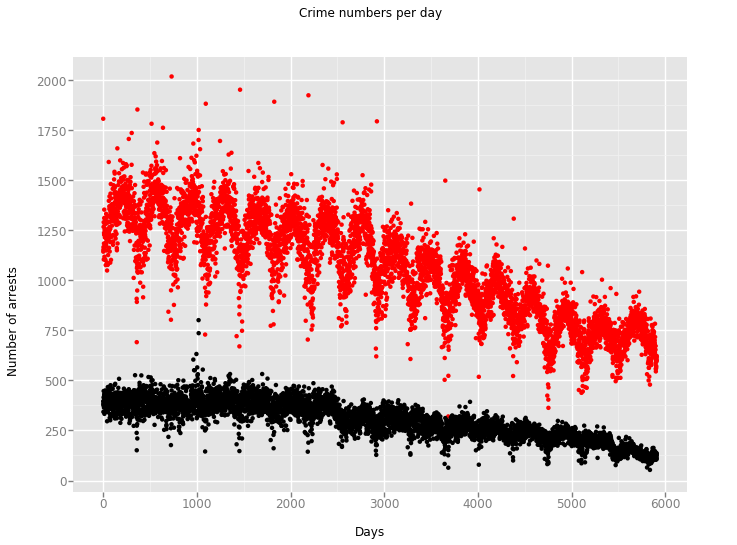

<ggplot: (-9223363269738641148)>

In [127]:
p =ggplot( aes(x = 'Days'),data = plot_df)
p + geom_point(aes(y='crimes_per_day',color = 'red')
    ) + geom_point(aes(y = 'Number of arrest per day',color = 'black')) + ggtitle("Crime numbers per day")+  ylab("Number of arrests")

In [124]:
plot_df.columns


Index(['Days', 'Number of arrest per day', 'avg_arrests_per_day',
       'crimes_per_day', 'police_cars_per_day'],
      dtype='object')

In [141]:
plot_df.columns

Index(['Days', 'Number of arrests per day',
       'Number of crimes committed per day', 'avg_arrests_per_day',
       'police_cars_per_day'],
      dtype='object')

In [ ]:
plt.plt(plot_df.loc[:,["Number of arrests per day","Number of crimes committed per day"]])

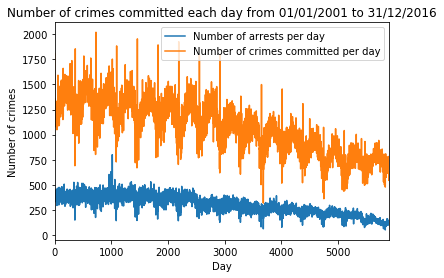

In [152]:
ax = plot_df.loc[:,["Number of arrests per day","Number of crimes committed per day"]].plot()
ax.set_xlabel("Day")
ax.set_ylabel("Number of crimes")
ax.set_title("Number of crimes committed each day from 01/01/2001 to 31/12/2016")
plt.figure(figsize=(10,10))
ax.get_figure().savefig('/home/chib/Documents/25TimeSeries/TimeSeries/proposalPlot.png')

In [134]:
pwd

'/home/chib/Documents/25TimeSeries/TimeSeries'